In [ ]:
# DIY Dataset Analysis

## Overview
This project performs an end-to-end analysis on a real-world dataset selected by the author.
The analysis includes data cleaning, exploratory data analysis (EDA), and visualization to extract insights.

## Dataset
- Source: <put dataset URL here>
- Rows: XXX
- Columns: XXX


Dataset Requirements:

Publicly accessible dataset (e.g., Kaggle, UCI, GitHub) in CSV format. 
Include the source URL in the notebook header.
You should be able to complete five distinct analyses from the assignment list without reusing the exact same combination of columns.
At least 200 rows and as many columns of the required type (numeric or categorical) to complete your analysis.
Must include at least one date/time column (for time-based analysis).

selected dataset URL: 

https://www.kaggle.com/datasets/shivamb/netflix-shows

For importing to Jupyter, we use a mirror website on GitHub (the same CSV dataset )
https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/netflix_titles.csv

[25 pts] Cleaning functions (5 required; 5 pts each)
Select five distinct operations from the list below:

Loading dataset(From github mirror)

In [28]:
# --- Load Netflix dataset directly from GitHub ---
url = "https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/netflix_titles.csv"
df = pd.read_csv(url)

print("Dataset loaded successfully!")
print(df.shape)
df.head()


Dataset loaded successfully!
(6234, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [47]:
# --- Import libraries ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

Cleaning Function 1 — Handle Missing Values

In [30]:
def show_changes(before: pd.DataFrame, after: pd.DataFrame, cols, max_rows=15):
    """
    Show what changed between before and after for the given cols.
    Handles:
      - changed values on common indexes
      - removed rows
      - added rows
    """
    if isinstance(cols, str):
        cols = [cols]

    # Common index for value changes
    common_idx = before.index.intersection(after.index)

    changed_rows = pd.DataFrame()
    if len(common_idx) > 0:
        b = before.loc[common_idx, cols]
        a = after.loc[common_idx, cols]
        diff_mask = (a != b).any(axis=1)
        changed_rows = a.loc[diff_mask]

    # Rows removed/added (by index)
    removed_idx = before.index.difference(after.index)
    added_idx   = after.index.difference(before.index)

    nothing = True
    if not changed_rows.empty:
        print("Changed rows on common index (showing up to {}):".format(max_rows))
        display(changed_rows.head(max_rows))
        nothing = False

    if len(removed_idx) > 0:
        print(f"{len(removed_idx)} rows removed (showing up to {max_rows}):")
        display(before.loc[removed_idx, cols].head(max_rows))
        nothing = False

    if len(added_idx) > 0:
        print(f"{len(added_idx)} rows added (showing up to {max_rows}):")
        display(after.loc[added_idx, cols].head(max_rows))
        nothing = False

    if nothing:
        print("No rows changed.")


In [31]:

def clean_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    before = df.copy()

    # Text fields to fill
    text_cols = [c for c in ["director", "cast", "country", "rating"] if c in df.columns]
    for c in text_cols:
        df[c] = df[c].fillna("Unknown").astype(str).str.strip()

    # release_year: force numeric, drop rows where still NaN
    if "release_year" in df.columns:
        df["release_year"] = pd.to_numeric(df["release_year"], errors="coerce")
        before_len = len(df)
        df = df.dropna(subset=["release_year"])
        df["release_year"] = df["release_year"].astype(int)
        print(f"Dropped {before_len - len(df)} rows with missing/invalid release_year.")

    print("\nRows changed for text columns (filled with 'Unknown'):")
    show_changes(before, df, text_cols or df.columns)
    return df

# --- Run the cleaning function ---
df = clean_missing_values(df)
df.shape


Dropped 0 rows with missing/invalid release_year.

Rows changed for text columns (filled with 'Unknown'):
Changed rows on common index (showing up to 15):


,director,cast,country,rating
1,Unknown,Jandino Asporaat,United Kingdom,TV-MA
2,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,TV-Y7-FV
3,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,TV-Y7
5,Unknown,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,TV-MA
8,Unknown,Unknown,United States,TV-MA
10,José Miguel Contreras,Joaquín Reyes,Unknown,TV-MA
12,Unknown,"Damandeep Singh Baggan, Smita Malhotra, Baba S...",Unknown,TV-Y7
13,"Munjal Shroff, Tilak Shetty","Damandeep Singh Baggan, Smita Malhotra, Baba S...",Unknown,TV-Y7
14,"Munjal Shroff, Tilak Shetty","Damandeep Singh Baggan, Smita Malhotra, Deepak...",Unknown,TV-Y
15,Tilak Shetty,"Damandeep Singh Baggan, Smita Malhotra, Baba S...",Unknown,TV-Y7


(6234, 12)

Cleaning Function 2 — Remove Duplicates

In [32]:
# --- Cleaning Function 2: Remove Duplicates ---
def remove_duplicates(df: pd.DataFrame) -> pd.DataFrame:
    subset = [c for c in ["title", "type", "country", "release_year"] if c in df.columns]

    if not subset:
        print("No suitable columns found for duplicate detection; demonstrating on toy data.")
        demo = pd.DataFrame({
            "title": ["A", "A", "B"],
            "type": ["Movie", "Movie", "TV Show"],
            "country": ["US", "US", "US"],
            "release_year": [2020, 2020, 2021]
        })
        print("Before removing duplicates:")
        display(demo)
        print("After removing duplicates:")
        display(demo.drop_duplicates(subset=subset))
        return df

    before = df.copy()
    dup_mask = df.duplicated(subset=subset, keep="first")
    dup_rows = df.loc[dup_mask, subset]

    if dup_rows.empty:
        print("✅ No duplicates found in dataset. Showing demonstration with toy data:")
        demo = pd.DataFrame({
            "title": ["A", "A", "B"],
            "type": ["Movie", "Movie", "TV Show"],
            "country": ["US", "US", "US"],
            "release_year": [2020, 2020, 2021]
        })
        print("Before removing duplicates:")
        display(demo)
        print("After removing duplicates:")
        display(demo.drop_duplicates(subset=subset))
        return df

    print(f"Found {dup_mask.sum()} duplicate rows. Removing them...")
    display(dup_rows.head(10))

    df = df.drop_duplicates(subset=subset, keep="first")
    print(f"✅ Removed {dup_mask.sum()} duplicate rows.")
    show_changes(before, df, subset)
    return df

# --- Run the duplicate cleaning ---
df = remove_duplicates(df)
df.shape


Found 2 duplicate rows. Removing them...


,title,type,country,release_year
2124,Sarkar,Movie,India,2018
5930,Kakegurui,TV Show,Japan,2019


✅ Removed 2 duplicate rows.
2 rows removed (showing up to 15):


,title,type,country,release_year
2124,Sarkar,Movie,India,2018
5930,Kakegurui,TV Show,Japan,2019


(6232, 12)

Cleaning Function 3: Normalize mixed-format dates to YYYY-MM-DD

In [33]:
# --- Cleaning Function 3: Normalize mixed-format dates to YYYY-MM-DD ---

def normalize_dates(df: pd.DataFrame) -> pd.DataFrame:
    before = df.copy()
    date_col = None

    # find a likely date column
    for c in df.columns:
        if "date" in c.lower():
            date_col = c
            break

    if date_col is None:
        print("No date column found — demonstrating with toy data:")
        demo = pd.DataFrame({
            "raw_date": ["September 9, 2019", "2018-07-12", "Jan 5 2020", "2021/3/9"]
        })
        print("Before normalization:")
        display(demo)
        demo["raw_date"] = pd.to_datetime(demo["raw_date"], errors="coerce").dt.strftime("%Y-%m-%d")
        print("After normalization:")
        display(demo)
        return df

    # Try converting the date column
    print(f"Normalizing column '{date_col}' to YYYY-MM-DD format...")
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce").dt.strftime("%Y-%m-%d")

    # Check for missing conversions
    n_missing = df[date_col].isna().sum()
    print(f"✅ Converted {len(df) - n_missing} valid dates. {n_missing} could not be parsed.")

    # Show sample of results
    show_changes(before, df, date_col)
    return df


# --- Run the date normalization ---
df = normalize_dates(df)
df.shape


Normalizing column 'date_added' to YYYY-MM-DD format...
✅ Converted 5582 valid dates. 650 could not be parsed.
Changed rows on common index (showing up to 15):


,date_added
0,2019-09-09
1,2016-09-09
2,2018-09-08
3,2018-09-08
4,2017-09-08
5,2017-09-08
6,2017-09-08
7,2017-09-08
8,2017-09-08
9,2017-09-08


(6232, 12)

Cleaning Function 4: Uniform Case Standardization

In [34]:
# --- Cleaning Function 4: Uniform case standardization for text columns ---

def standardize_text_case(df: pd.DataFrame) -> pd.DataFrame:
    before = df.copy()

    # Choose columns that contain text data
    text_cols = df.select_dtypes(include="object").columns.tolist()
    print(f"Standardizing case for {len(text_cols)} text columns...")

    for c in text_cols:
        # Remove leading/trailing spaces
        df[c] = df[c].astype(str).str.strip()

        # For short categorical columns (like "type", "country"), make Title Case
        if df[c].nunique() < 100:  
            df[c] = df[c].str.title()
        else:
            # For long text fields (like 'description'), make lowercase
            df[c] = df[c].str.lower()

    show_changes(before, df, text_cols[:5])  # Show sample from first few columns
    return df


# --- Run the standardization ---
df = standardize_text_case(df)
df.shape


Standardizing case for 10 text columns...
Changed rows on common index (showing up to 15):


,type,title,director,cast,country
0,Movie,norm of the north: king sized adventure,"richard finn, tim maltby","alan marriott, andrew toth, brian dobson, cole...","united states, india, south korea, china"
1,Movie,jandino: whatever it takes,unknown,jandino asporaat,united kingdom
2,Tv Show,transformers prime,unknown,"peter cullen, sumalee montano, frank welker, j...",united states
3,Tv Show,transformers: robots in disguise,unknown,"will friedle, darren criss, constance zimmer, ...",united states
4,Movie,#realityhigh,fernando lebrija,"nesta cooper, kate walsh, john michael higgins...",united states
5,Tv Show,apaches,unknown,"alberto ammann, eloy azorín, verónica echegui,...",spain
6,Movie,automata,gabe ibáñez,"antonio banderas, dylan mcdermott, melanie gri...","bulgaria, united states, spain, canada"
7,Movie,fabrizio copano: solo pienso en mi,"rodrigo toro, francisco schultz",fabrizio copano,chile
8,Tv Show,fire chasers,unknown,unknown,united states
9,Movie,good people,henrik ruben genz,"james franco, kate hudson, tom wilkinson, omar...","united states, united kingdom, denmark, sweden"


(6232, 12)

Cleaning Function 5 — Handle Invalid / Outlier Numeric Values

In [35]:
# --- Cleaning Function 5: Handle invalid or outlier numeric values ---

def clean_release_year(df: pd.DataFrame) -> pd.DataFrame:
    before = df.copy()

    if "release_year" not in df.columns:
        print("No 'release_year' column found — creating a demo example instead.")
        demo = pd.DataFrame({"release_year": [1895, 1999, 2026, 2020, np.nan]})
        print("Before cleaning:")
        display(demo)
        demo["release_year"] = pd.to_numeric(demo["release_year"], errors="coerce")
        demo.loc[(demo["release_year"] < 1900) | (demo["release_year"] > 2025), "release_year"] = np.nan
        print("After cleaning:")
        display(demo)
        return df

    # Force numeric type
    df["release_year"] = pd.to_numeric(df["release_year"], errors="coerce")

    # Define realistic range
    valid_min, valid_max = 1900, 2025
    outlier_mask = (df["release_year"] < valid_min) | (df["release_year"] > valid_max)

    n_outliers = outlier_mask.sum()
    df.loc[outlier_mask, "release_year"] = np.nan
    print(f"✅ Replaced {n_outliers} invalid or out-of-range release_year values with NaN.")

    show_changes(before, df, "release_year")
    return df


# --- Run the release_year cleaning ---
df = clean_release_year(df)
df.shape


✅ Replaced 0 invalid or out-of-range release_year values with NaN.
No rows changed.


(6232, 12)

Part 2, Analysis

Top-N within each group

In [36]:
print("Top 3 directors by country:")
top_n = (
    df.groupby(["country", "director"])
      .size()
      .reset_index(name="num_titles")
      .sort_values(["country", "num_titles"], ascending=[True, False])
)

top3_by_country = top_n.groupby("country").head(3)
display(top3_by_country)


Top 3 directors by country:


,country,director,num_titles
22,argentina,unknown,12
20,argentina,"raúl campos, jan suter",5
0,argentina,alejandro doria,1
23,"argentina, brazil, france, poland, germany, de...",diego lerman,1
24,"argentina, chile","cecilia atán, valeria pivato",1
...,...,...,...
3678,"venezuela, colombia",jorge granier,1
3679,vietnam,dustin nguyen,1
3680,vietnam,ham tran,1
3681,vietnam,le van kiet,1


Bin Comparison

In [37]:

df["duration_min"] = df["duration"].str.extract(r"(\d+)").astype(float)

# Divide release_year into 4 bins
df["year_bin"] = pd.cut(df["release_year"], bins=4)

# Compute average duration per bin
duration_by_bin = (
    df.groupby("year_bin", observed=True)["duration_min"]
      .mean()
      .reset_index()
      .rename(columns={"duration_min": "avg_duration_min"})
)

print("Average duration per release year bin:")
display(duration_by_bin)


Average duration per release year bin:


,year_bin,avg_duration_min
0,"(1924.905, 1948.75]",47.750000
1,"(1948.75, 1972.5]",118.228571
2,"(1972.5, 1996.25]",99.828000
3,"(1996.25, 2020.0]",66.792446


Conditional Aggregation

In [38]:
### Task 3: Conditional Aggregation — Average duration by rating (Movies only)

# Filter only Movies
movies = df[df["type"] == "Movie"]

# Compute average duration by rating
avg_duration = (
    movies.groupby("rating", observed=True)["duration_min"]
          .mean()
          .reset_index()
          .rename(columns={"duration_min": "avg_duration_min"})
          .sort_values("avg_duration_min", ascending=False)
)

print("Average movie duration by rating:")
display(avg_duration)


Average movie duration by rating:


,rating,avg_duration_min
1,Nc-17,131.500000
14,Ur,110.000000
4,Pg-13,108.853147
6,Tv-14,108.137765
5,R,106.158103
9,Tv-Pg,97.949074
3,Pg,97.786885
8,Tv-Ma,95.245731
2,Nr,95.123762
0,G,85.361111


Percentage Distribution

Percentage distribution of Movies vs TV Shows:


,type,percentage
0,Movie,68.421053
1,Tv Show,31.578947


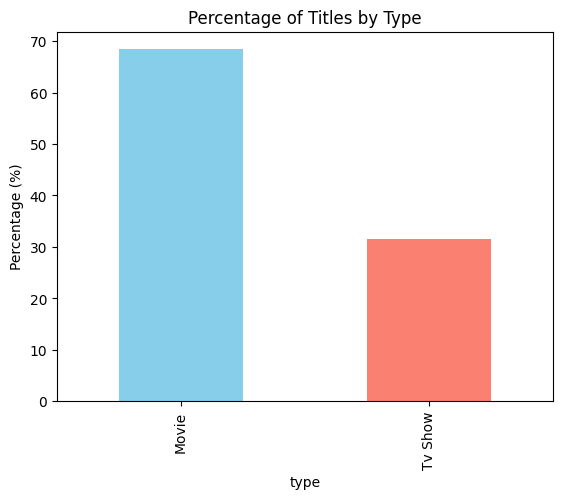

In [39]:
### Task 4: Percentage Distribution — share of titles by type

type_distribution = (
    df["type"].value_counts(normalize=True) * 100
).reset_index()
type_distribution.columns = ["type", "percentage"]

print("Percentage distribution of Movies vs TV Shows:")
display(type_distribution)

# Optional: simple bar chart
type_distribution.plot(
    x="type", y="percentage", kind="bar", color=["skyblue", "salmon"],
    legend=False, title="Percentage of Titles by Type"
)
plt.ylabel("Percentage (%)")
plt.show()


Change Over Time: Titles Added per Year

Number of titles added to Netflix each year:


,year_added,num_titles
3,2011.0,13
4,2012.0,7
5,2013.0,9
6,2014.0,19
7,2015.0,74
8,2016.0,412
9,2017.0,1184
10,2018.0,1629
11,2019.0,2056
12,2020.0,174


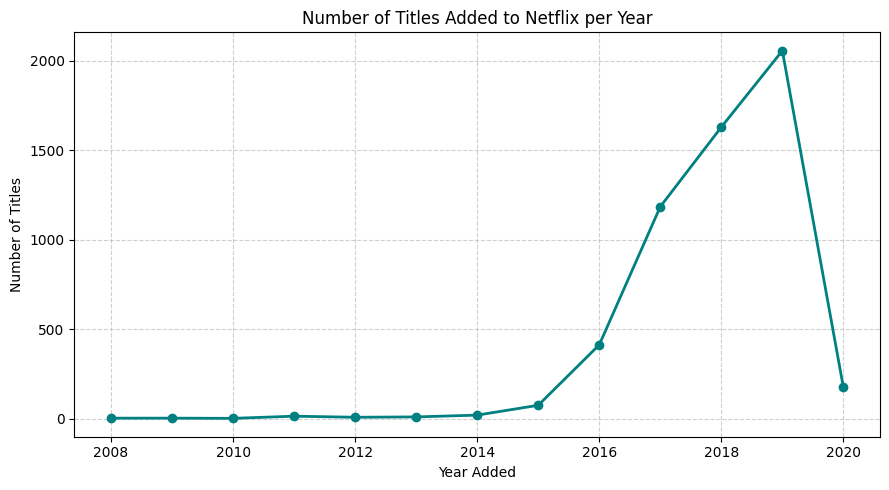

In [40]:
### Task 5: Change Over Time — number of titles added per year

# Ensure matplotlib is available
import matplotlib.pyplot as plt

# Convert date_added to datetime and extract the year
df["year_added"] = pd.to_datetime(df["date_added"], errors="coerce").dt.year

# Group by year_added and count titles
titles_by_year = (
    df.groupby("year_added", observed=True)
      .size()
      .reset_index(name="num_titles")
      .dropna()
      .sort_values("year_added")
)

print("Number of titles added to Netflix each year:")
display(titles_by_year.tail(10))

# --- Plot the trend ---
plt.figure(figsize=(9, 5))
plt.plot(
    titles_by_year["year_added"], 
    titles_by_year["num_titles"], 
    marker="o", 
    linewidth=2, 
    color="teal"
)
plt.title("Number of Titles Added to Netflix per Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Part3 Visualization

Pie Chart – Distribution of Movies vs TV Shows

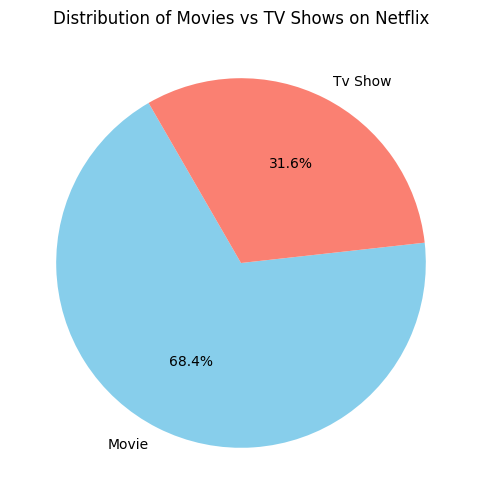

In [41]:
import matplotlib.pyplot as plt

type_counts = df["type"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct="%1.1f%%",
    startangle=120,
    colors=["skyblue", "salmon"]
)
plt.title("Distribution of Movies vs TV Shows on Netflix")
plt.show()


Line Chart – Growth of Titles Added Over Time

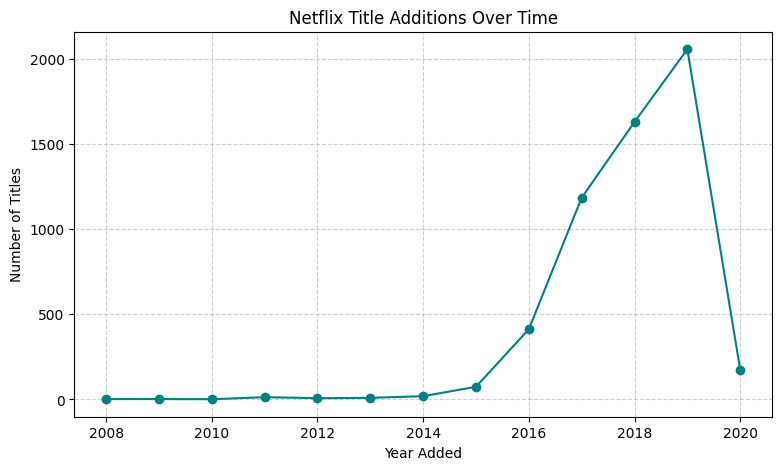

In [42]:
titles_by_year = (
    df.groupby("year_added", observed=True)
      .size()
      .reset_index(name="num_titles")
      .dropna()
      .sort_values("year_added")
)

plt.figure(figsize=(9, 5))
plt.plot(
    titles_by_year["year_added"],
    titles_by_year["num_titles"],
    marker="o",
    color="teal"
)
plt.title("Netflix Title Additions Over Time")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Box Plot – Distribution of Movie Durations by Rating

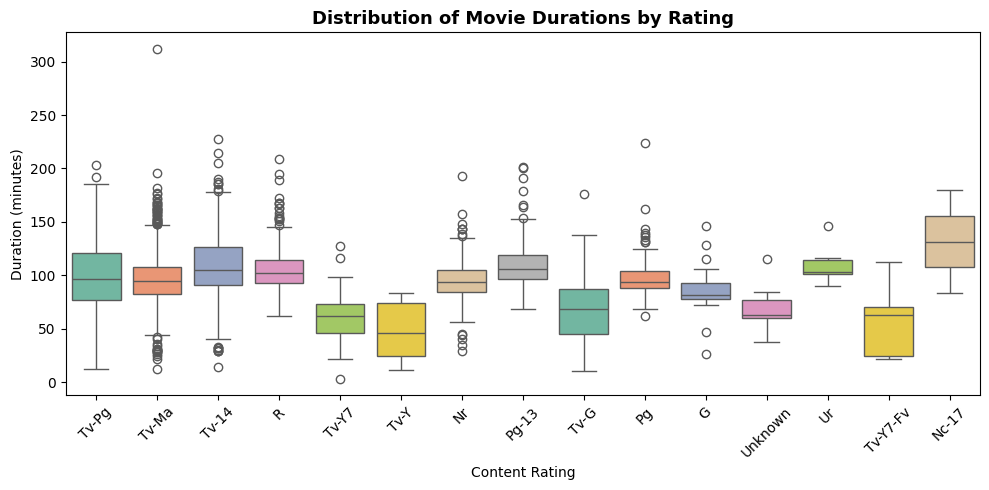

In [48]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df[df["type"] == "Movie"],
    x="rating",
    y="duration_min",
    hue="rating",           # ← add this to satisfy seaborn>=0.14
    legend=False,
    palette="Set2"
)
plt.title("Distribution of Movie Durations by Rating", fontsize=13, weight='bold')
plt.xlabel("Content Rating")
plt.ylabel("Duration (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Summary: Higher-rated categories like R and NC-17 have slightly longer movies, while G and TV-Y categories tend to be shorter and more consistent in duration.

Histogram – Distribution of Release Years

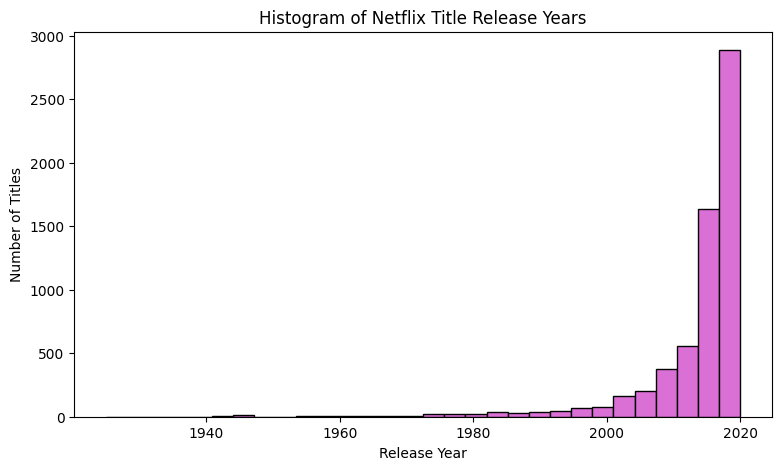

In [49]:
plt.figure(figsize=(9, 5))
plt.hist(df["release_year"].dropna(), bins=30, color="orchid", edgecolor="black")
plt.title("Histogram of Netflix Title Release Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()


Summary: The majority of Netflix content was released after 2010, reflecting Netflix’s focus on modern productions and new releases.

Heatmap – Correlation Between Numeric Columns

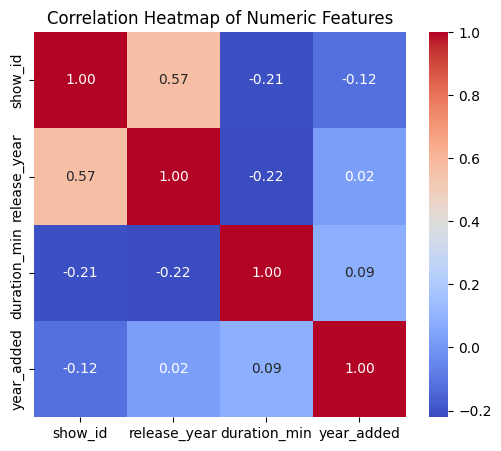

In [50]:
numeric_cols = df.select_dtypes(include=["float64", "int64"])
plt.figure(figsize=(6, 5))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Summary: There’s minimal correlation between numeric columns, such as duration, release_year, and year_added, indicating diverse and independent distributions.